#### PREREQUISITE BEFORE STARTING
* BEFORE STARTING WE MUST RESTORE THE DATABASE IN POSTGRES.
* THEN CREATE ENVIRONMENT VARIABLES USING THE  VARIABLE NAMES GIVEN BELOW.

* CONNECTING THE POSTGRES WITH THE JUPYTER NOTEBOOK BY USING ENVIRONMENT VARIABLES

CREATE ENVIRONMEANT VARIABLES-->
* Variable Name: PG_DBNAME → Value: hotel_analysis
* Variable Name: PG_USER → Value: postgres
* Variable Name: PG_PASSWORD → Value: your_password
* Variable Name: PG_HOST → Value: localhost
* Variable Name: PG_PORT → Value: 5432

THEN RESTART THE SYSTEM

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

##### Conncting jupyter to postgres

In [2]:
!pip install psycopg2 sqlalchemy pandas 

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import psycopg2
import os
from sqlalchemy import create_engine,text
from urllib.parse import quote

In [4]:
dbname = os.getenv("PG_DBNAME")
user = os.getenv("PG_USER")
password = quote(os.getenv("PG_PASSWORD"))
host = os.getenv("PG_HOST")
port = os.getenv("PG_PORT")

In [5]:
engine = create_engine(f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{dbname}")

#### Data Cleaning And Preprocessing

In [6]:
with engine.begin() as conn:
    conn.execute(text("update hotel set meal = null where meal = 'Undefined';"))

In [7]:
with engine.begin() as conn:
    conn.execute(text("update hotel set distribution_channel = null where distribution_channel = 'Undefined';"))

In [8]:
with engine.begin() as conn:
    conn.execute(text("update hotel set market_segment = null where market_segment = 'Undefined';"))

In [9]:
df = pd.read_sql("select * from hotel", engine)

In [10]:
df[df['meal']=='Undefined']['meal']

Series([], Name: meal, dtype: object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_night             119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [12]:
del df['company']  ###less values comapred to huge dataset

In [13]:
df.children=df.children.fillna(df.children.mode()[0])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_night             119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [15]:
df.country=df.country.fillna(df.country.mode()[0])

In [16]:
df.agent=df.agent.fillna(df.agent.mean())

In [17]:
df.meal=df.meal.fillna(df.meal.mode()[0])

In [18]:
df.market_segment=df.market_segment.fillna(df.market_segment.mode()[0])

In [19]:
df.distribution_channel=df.distribution_channel.fillna(df.distribution_channel.mode()[0])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_night             119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [21]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_night               0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [22]:
df['children'] = df['children'].astype(int)

In [23]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_night,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,102.915247,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


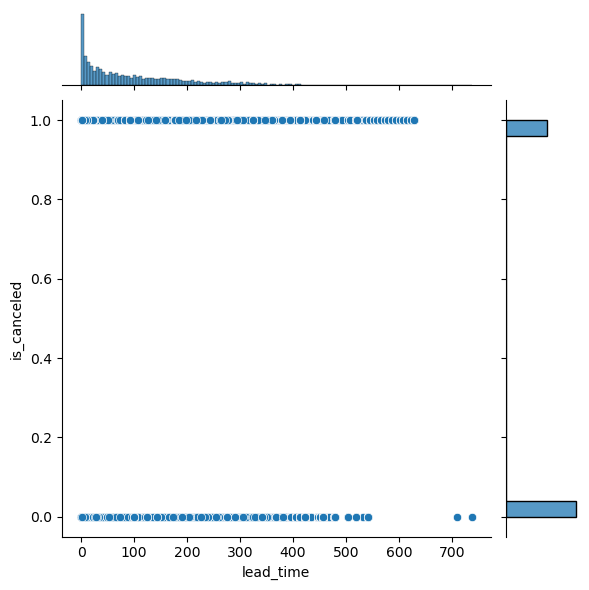

In [24]:
sns.jointplot(x='lead_time',y='is_canceled',data=df)

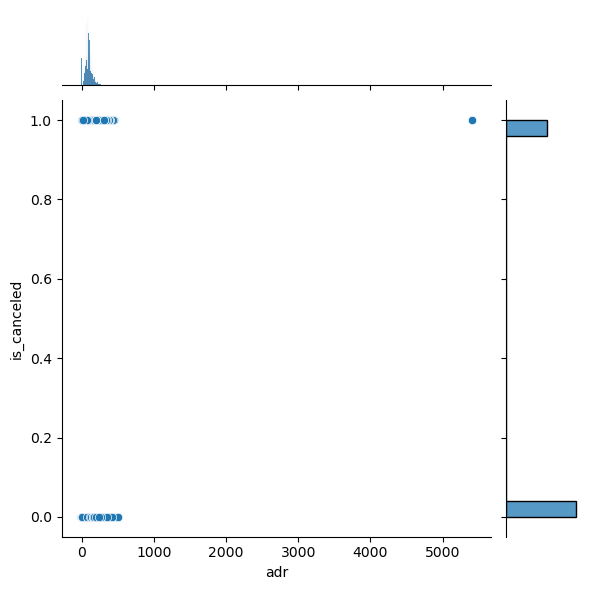

In [25]:
sns.jointplot(x='adr',y='is_canceled',data=df)

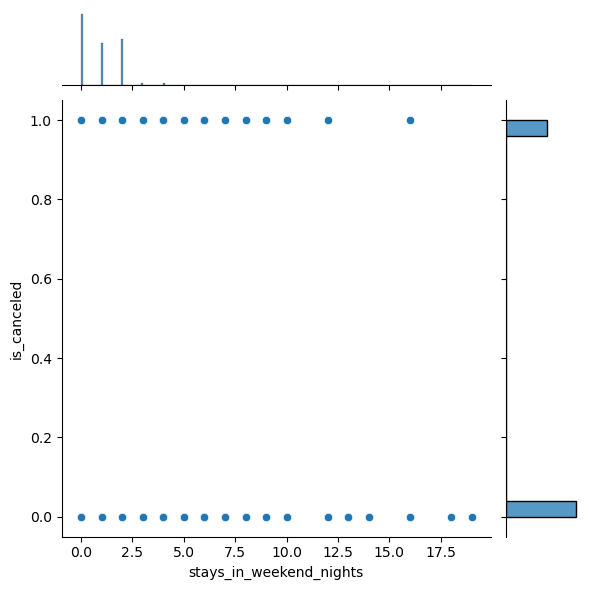

In [26]:
sns.jointplot(x='stays_in_weekend_nights',y='is_canceled',data=df)

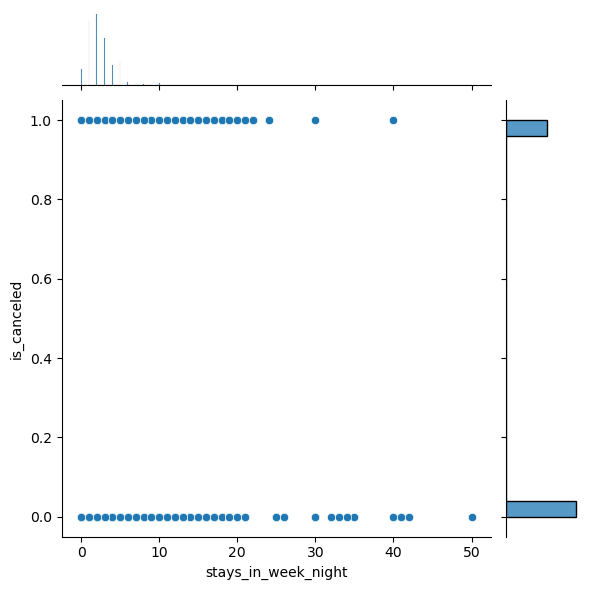

In [27]:
sns.jointplot(x='stays_in_week_night',y='is_canceled',data=df)

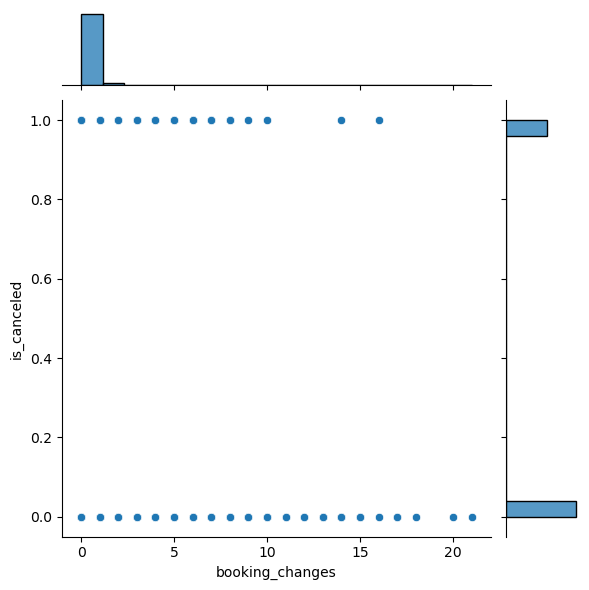

In [28]:
sns.jointplot(x='booking_changes',y='is_canceled',data=df)

In [29]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_night,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,102.915247,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


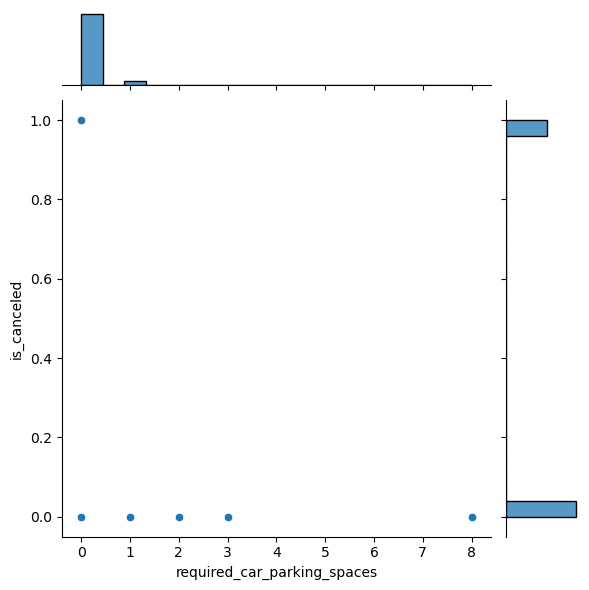

In [30]:
sns.jointplot(x='required_car_parking_spaces',y='is_canceled',data=df)

In [31]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_night,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,102.915247,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


#### OUTLIER TREATMENT

OUTLIERS
* LEAD_TIME
* ADR

In [32]:
np.percentile(df.lead_time,[99])[0]

444.0

In [33]:
ul1=np.percentile(df.lead_time,[99])[0]

In [34]:

df[(df.lead_time)>ul1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_night,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1503,Resort Hotel,0,709,2016,February,9,25,8,20,2,...,2,No Deposit,86.693382,0,Transient,68.00,0,0,Check-Out,2016-03-24
2061,Resort Hotel,1,462,2017,May,21,25,0,3,2,...,0,Non Refund,86.693382,0,Transient,78.00,0,0,Canceled,2016-06-07
2062,Resort Hotel,1,462,2017,May,21,25,0,3,2,...,0,Non Refund,86.693382,0,Transient,78.00,0,0,Canceled,2016-06-07
2063,Resort Hotel,1,462,2017,May,21,25,0,3,2,...,0,Non Refund,86.693382,0,Transient,78.00,0,0,Canceled,2016-06-07
2064,Resort Hotel,1,462,2017,May,21,25,0,3,2,...,0,Non Refund,86.693382,0,Transient,78.00,0,0,Canceled,2016-06-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117941,City Hotel,0,518,2017,August,34,26,2,1,1,...,1,No Deposit,229.000000,0,Transient-Party,0.00,0,0,Check-Out,2017-08-29
117946,City Hotel,0,518,2017,August,34,26,2,1,2,...,0,No Deposit,229.000000,0,Transient-Party,112.67,0,1,Check-Out,2017-08-29
117948,City Hotel,0,518,2017,August,34,26,2,1,2,...,0,No Deposit,229.000000,0,Transient-Party,112.67,0,1,Check-Out,2017-08-29
117950,City Hotel,0,518,2017,August,34,26,2,1,2,...,0,No Deposit,229.000000,0,Transient-Party,112.67,0,1,Check-Out,2017-08-29


In [35]:
df.lead_time[(df.lead_time)>1.5*ul1]=1.5*ul1

C:\Users\SOUMYA RANJAN MISHRA\AppData\Local\Temp\ipykernel_18620\217219094.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.lead_time[(df.lead_time)>1.5*ul1]=1.5*ul1
C:\Users\SOUMYA RANJAN MISHRA\AppData\Local\Temp\ipykernel_18620\2172

In [36]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_night,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.010462,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.857805,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,102.915247,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,666.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


In [37]:
np.percentile(df.adr,[99])[0]

252.0

In [38]:
ul2=np.percentile(df.adr,[99])[0]

In [39]:
df[(df.adr)>ul2]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_night,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1079,Resort Hotel,0,31,2015,August,33,15,2,4,2,...,0,No Deposit,86.693382,0,Transient-Party,299.33,1,1,Check-Out,2015-08-21
1417,Resort Hotel,0,52,2015,December,53,31,0,1,2,...,1,No Deposit,86.693382,0,Transient,332.00,1,1,Check-Out,2016-01-01
1419,Resort Hotel,1,55,2015,December,53,31,0,3,3,...,0,No Deposit,86.693382,0,Transient,276.60,0,0,Canceled,2015-11-17
1746,Resort Hotel,1,6,2016,August,35,25,0,1,2,...,0,No Deposit,86.693382,0,Transient,269.00,0,0,Canceled,2016-08-25
1938,Resort Hotel,1,42,2016,December,53,31,1,1,2,...,0,No Deposit,86.693382,0,Transient-Party,275.00,0,0,Canceled,2016-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119095,Resort Hotel,0,88,2016,August,34,18,2,5,2,...,1,No Deposit,250.000000,0,Transient,286.10,1,0,Check-Out,2016-08-25
119359,Resort Hotel,0,4,2017,June,25,23,0,2,2,...,2,No Deposit,250.000000,0,Transient,265.25,1,2,Check-Out,2017-06-25
119371,Resort Hotel,0,31,2017,August,31,1,2,6,2,...,0,No Deposit,250.000000,0,Transient,426.25,0,2,Check-Out,2017-08-09
119381,Resort Hotel,0,26,2017,August,34,24,2,4,3,...,1,No Deposit,250.000000,0,Transient,350.75,0,1,Check-Out,2017-08-30


In [40]:
df.adr[(df.adr)>2*ul2]=2*ul2

C:\Users\SOUMYA RANJAN MISHRA\AppData\Local\Temp\ipykernel_18620\1064439254.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.adr[(df.adr)>2*ul2]=2*ul2
C:\Users\SOUMYA RANJAN MISHRA\AppData\Local\Temp\ipykernel_18620\1064439254.py:1: Se

In [41]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_night,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.010462,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,2.321149,101.790029,0.062518,0.571363
std,0.482918,106.857805,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,102.915247,17.594721,48.166716,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,666.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,504.000000,8.000000,5.000000


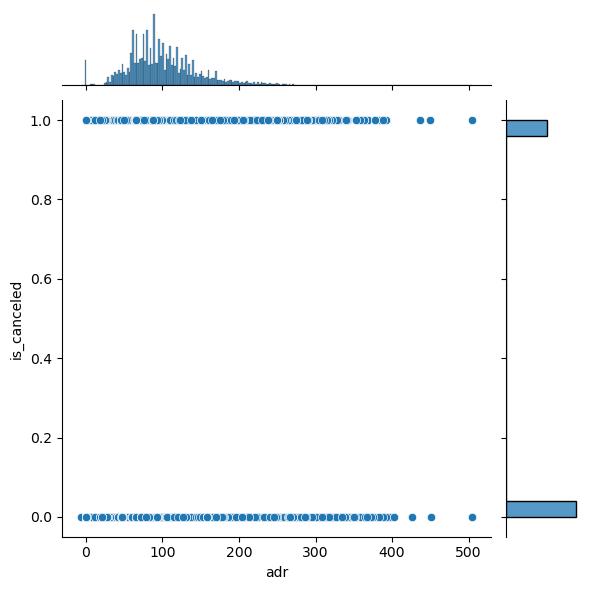

In [42]:
sns.jointplot(x='adr',y='is_canceled',data=df)

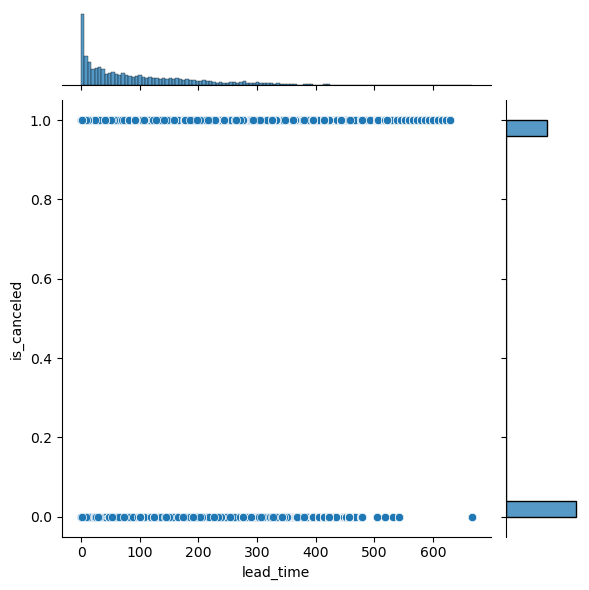

In [43]:
sns.jointplot(x='lead_time',y='is_canceled',data=df)

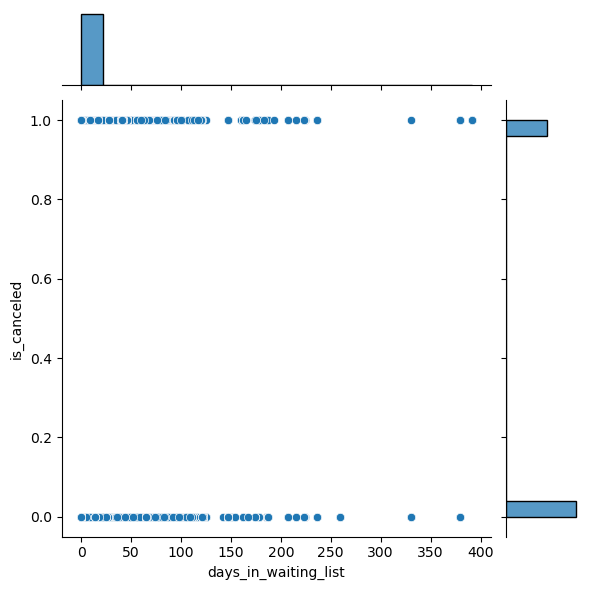

In [44]:
sns.jointplot(x='days_in_waiting_list',y='is_canceled',data=df)

# Feature Engineering


#### Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
num_cols = ['stays_in_weekend_nights', 'stays_in_week_night', 'adults',
            'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled',
            'booking_changes', 'days_in_waiting_list', 
            'required_car_parking_spaces', 'total_of_special_requests']

In [47]:
scaler = StandardScaler()

In [48]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [49]:
df.to_csv("scaled_dataset.csv", index=False)

In [50]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_night,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,119390.000000,1.193900e+05,1.193900e+05,1.193900e+05,119390.000000,1.193900e+05,119390.000000,1.193900e+05,1.193900e+05
mean,0.370416,104.010462,2016.156554,27.165173,15.798241,1.018887e-16,3.094750e-18,-3.808923e-18,-4.761154e-17,5.862171e-18,0.031912,-2.999527e-17,2.237742e-17,4.189816e-17,86.693382,4.094593e-17,101.790029,-3.237585e-17,-3.237585e-17
std,0.482918,106.857805,0.707476,13.605138,8.780829,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,0.175767,1.000004e+00,1.000004e+00,1.000004e+00,102.915247,1.000004e+00,48.166716,1.000004e+00,1.000004e+00
min,0.000000,0.000000,2015.000000,1.000000,1.000000,-9.288904e-01,-1.310240e+00,-3.204792e+00,-2.606586e-01,-8.157926e-02,0.000000,-1.031795e-01,-9.155477e-02,-3.389899e-01,1.000000,-1.319236e-01,-6.380000,-2.548729e-01,-7.206941e-01
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,-9.288904e-01,-7.862072e-01,2.478973e-01,-2.606586e-01,-8.157926e-02,0.000000,-1.031795e-01,-9.155477e-02,-3.389899e-01,9.000000,-1.319236e-01,69.290000,-2.548729e-01,-7.206941e-01
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,7.250220e-02,-2.621744e-01,2.478973e-01,-2.606586e-01,-8.157926e-02,0.000000,-1.031795e-01,-9.155477e-02,-3.389899e-01,28.000000,-1.319236e-01,94.575000,-2.548729e-01,-7.206941e-01
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,1.073895e+00,2.618584e-01,2.478973e-01,-2.606586e-01,-8.157926e-02,0.000000,-1.031795e-01,-9.155477e-02,-3.389899e-01,152.000000,-1.319236e-01,126.000000,-2.548729e-01,5.406659e-01
max,1.000000,666.000000,2017.000000,53.000000,31.000000,1.809757e+01,2.489140e+01,9.174417e+01,2.483007e+01,1.025501e+02,1.000000,3.069036e+01,4.799081e+01,3.185465e+01,535.000000,2.209074e+01,504.000000,3.235957e+01,5.586106e+00


In [51]:
print(df.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0          0               2015               July   
1  Resort Hotel            0         78               2015           November   
2  Resort Hotel            0         15               2015           November   
3  Resort Hotel            0         78               2015           November   
4  Resort Hotel            0         78               2015           November   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        47                         21   
2                        47                         21   
3                        47                         21   
4                        47                         21   

   stays_in_weekend_nights  stays_in_week_night    adults  ...  \
0                 -0.92889            -0.786207  0.247897  ...   
1                 -0.92889      

#### Categorical Grouping

In [52]:
def lead_time_category(lead_time):
    if lead_time<30:
        return "Short"
    elif 30<=lead_time<90:
        return "Medium"
    else:
        return "Large"

In [53]:
df['lead_time_category']=df['lead_time'].apply(lead_time_category)

In [54]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_night,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_category
0,Resort Hotel,0,0,2015,July,27,1,-0.92889,-0.786207,0.247897,...,No Deposit,86.693382,-0.131924,Transient,107.42,-0.254873,-0.720694,Check-Out,2015-07-02,Short
1,Resort Hotel,0,78,2015,November,47,21,-0.92889,-0.786207,0.247897,...,No Deposit,86.693382,-0.131924,Transient-Party,32.00,-0.254873,-0.720694,Check-Out,2015-11-22,Medium
2,Resort Hotel,0,15,2015,November,47,21,-0.92889,-0.786207,0.247897,...,No Deposit,86.693382,-0.131924,Transient-Party,44.00,-0.254873,-0.720694,Check-Out,2015-11-22,Short
3,Resort Hotel,0,78,2015,November,47,21,-0.92889,-0.786207,0.247897,...,No Deposit,86.693382,-0.131924,Transient-Party,32.00,-0.254873,-0.720694,Check-Out,2015-11-22,Medium
4,Resort Hotel,0,78,2015,November,47,21,-0.92889,-0.786207,0.247897,...,No Deposit,86.693382,-0.131924,Transient-Party,32.00,-0.254873,-0.720694,Check-Out,2015-11-22,Medium


# Complex Calculations And Advanced Functions

In [55]:
import matplotlib.pyplot as plt

#### Running Total Analysis

In [56]:
query1="""
select reservation_status_date as final_status_date,
sum(is_canceled) over(order by reservation_status_date) as cumulative_cancellations
    from hotel
        where is_canceled=1
            order by final_status_date;
"""

In [57]:
df1=pd.read_sql(query1,engine)

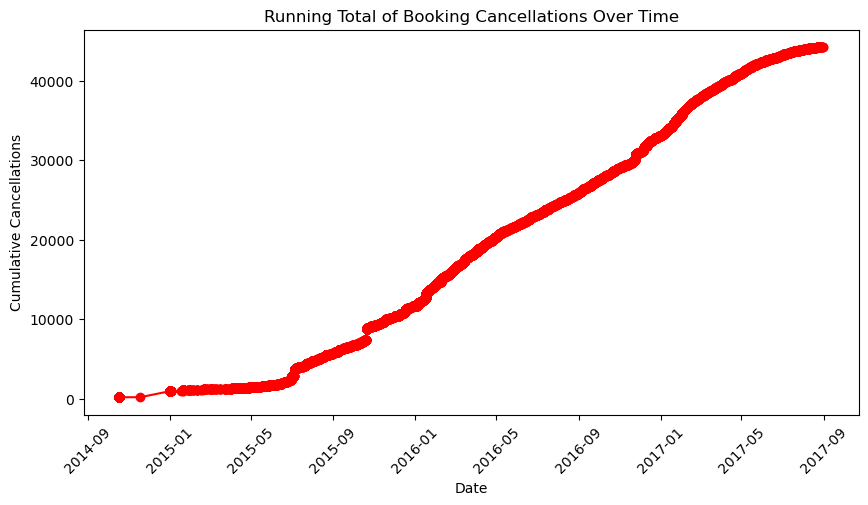

In [58]:
plt.figure(figsize=(10,5))
plt.plot(df1["final_status_date"], df1["cumulative_cancellations"], marker="o", linestyle="-", color="red", label="Cumulative Cancellations")
plt.xlabel("Date")
plt.ylabel("Cumulative Cancellations")
plt.title("Running Total of Booking Cancellations Over Time")
plt.xticks(rotation=45)
plt.show()

#### Weighted Booking Score

In [59]:
query2="""
select 
    round((previous_cancellations)+1/
    ((previous_cancellations+previous_bookings_not_canceled)+1),2)
    from hotel; 
"""

In [60]:
df2=pd.read_sql(query2,engine)

In [61]:
df2.head(10)

,round
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


#### Dynamic Rank Calculation

In [62]:
query3="""
select hotel,
       count(*) as total_bookings,
       sum(case when is_canceled=1 then 1 else 0 end) as total_cancellations,
       round(100.0*sum(case when is_canceled=1 then 1 else 0 end)/count(*),2) as cancellation_rate,
       rank() over(order by round(100.0*sum(case when is_canceled=1 then 1 else 0 end)/count(*),2) desc) as rank
from hotel
group by hotel 
order by rank;"""

In [63]:
df3 = pd.read_sql(query3, engine)

In [64]:
df3.head()

,hotel,total_bookings,total_cancellations,cancellation_rate,rank
0,City Hotel,79330,33102,41.73,1
1,Resort Hotel,40060,11122,27.76,2


# Advanced Filtering And Parameterized Visualizations


#### Dynamic Market Segment Analysis:

In [65]:
query5="""
select count(*) from hotel where market_segment in ('Groups');
"""
# MARKET SEGMENTS
# "Groups"
# "Online TA"
# "Corporate"
# "Direct"
# "Complementary"
# "Offline TA/TO"
# "Aviation"

In [66]:
df5=pd.read_sql(query5,engine)

In [67]:
df5.head()

,count
0,19811


#### Find High-Risk Customers

In [68]:
query6="""
select count(*) from hotel where previous_cancellations>1;
"""

In [69]:
df6=pd.read_sql(query6,engine)

In [70]:
df6.head()

,count
0,433


In [71]:
query7="""
select hotel,previous_cancellations,previous_bookings_not_canceled,
adults,children,babies,customer_type,country
    from hotel 
        where previous_cancellations>1;
"""

In [72]:
df7=pd.read_sql(query7,engine)

In [73]:
df7.head()

,hotel,previous_cancellations,previous_bookings_not_canceled,adults,children,babies,customer_type,country
0,Resort Hotel,2,10,1,0.0,0,Transient,PRT
1,Resort Hotel,2,11,2,0.0,0,Transient,PRT
2,Resort Hotel,2,12,1,0.0,0,Transient,PRT
3,Resort Hotel,2,13,1,0.0,0,Transient,PRT
4,Resort Hotel,2,8,1,0.0,0,Transient,PRT


#### Most Frequent Guests

In [74]:
query8="""
select adults,children,babies,customer_type,country
    from hotel where is_repeated_guest=1;
"""

In [75]:
df8=pd.read_sql(query8,engine)

In [76]:
df8.head()

,adults,children,babies,customer_type,country
0,1,0.0,0,Transient,PRT
1,1,0.0,0,Transient,PRT
2,1,0.0,0,Transient,PRT
3,1,0.0,0,Transient,PRT
4,1,0.0,0,Transient,PRT


In [77]:
query9="""
select count(*)
    from hotel where is_repeated_guest=1;
"""

In [78]:
df9=pd.read_sql(query9,engine)

In [79]:
df9.head()

,count
0,3810


#### Seasonal Booking Trends

In [80]:
query10="""
select arrival_date_month as month, hotel, count(*) as total_bookings
    from hotel 
        group by month, hotel
            order by total_bookings desc;
"""

In [81]:
query11="""
select arrival_date_month as month, count(*) as total_bookings
    from hotel 
        group by month
            order by total_bookings desc;
"""

In [82]:
df10=pd.read_sql(query10,engine)

In [83]:
df10.head(24)

,month,hotel,total_bookings
0,August,City Hotel,8983
1,May,City Hotel,8232
2,July,City Hotel,8088
3,June,City Hotel,7894
4,October,City Hotel,7605
5,April,City Hotel,7480
6,September,City Hotel,7400
7,March,City Hotel,6458
8,February,City Hotel,4965
9,August,Resort Hotel,4894


In [84]:
df11=pd.read_sql(query11,engine)

In [85]:
df11.head(12)

,month,total_bookings
0,August,13877
1,July,12661
2,May,11791
3,October,11160
4,April,11089
5,June,10939
6,September,10508
7,March,9794
8,February,8068
9,November,6794


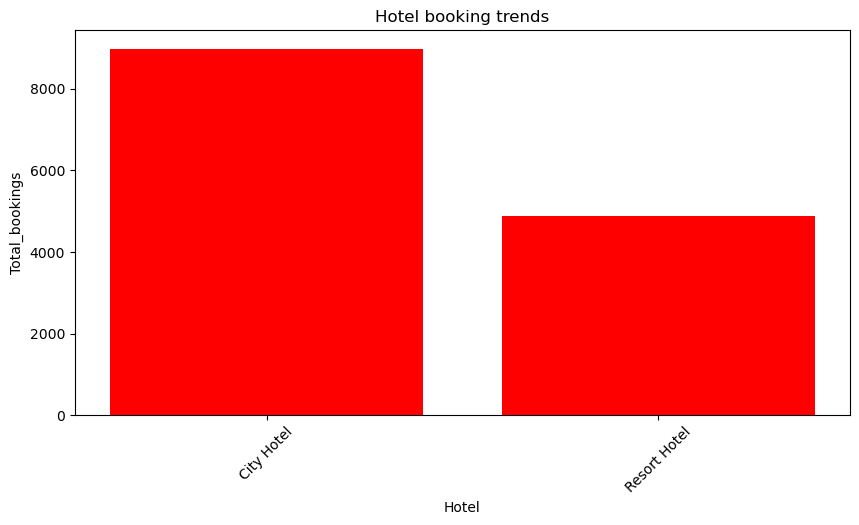

In [86]:
plt.figure(figsize=(10,5))
plt.bar(df10['hotel'],df10['total_bookings'],color='red')
plt.xlabel("Hotel")
plt.ylabel("Total_bookings")
plt.title("Hotel booking trends")
plt.xticks(rotation=45)
plt.show()

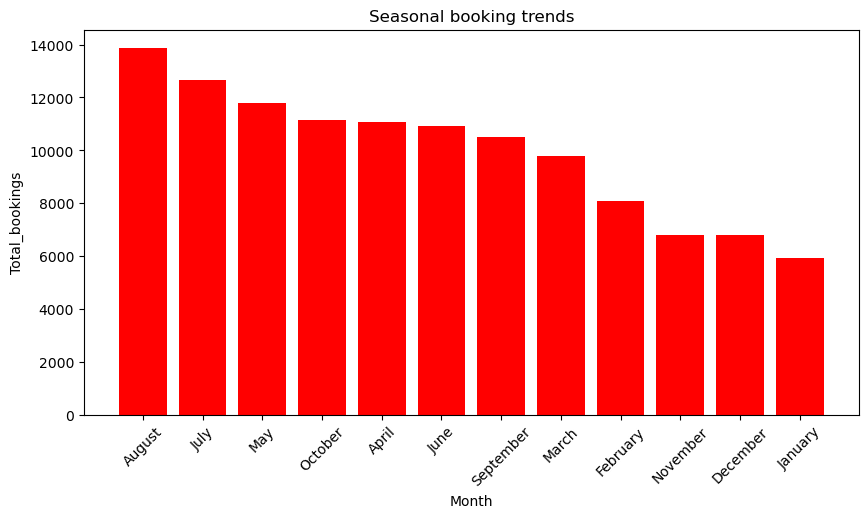

In [87]:
plt.figure(figsize=(10,5))
plt.bar(df11['month'],df11['total_bookings'],color='red')
plt.xlabel("Month")
plt.ylabel("Total_bookings")
plt.title("Seasonal booking trends")
plt.xticks(rotation=45)
plt.show()

In [88]:
help(pd.pivot)

Help on function pivot in module pandas.core.reshape.pivot:

pivot(data: 'DataFrame', *, columns: 'IndexLabel', index: 'IndexLabel | lib.NoDefault' = <no_default>, values: 'IndexLabel | lib.NoDefault' = <no_default>) -> 'DataFrame'
    Return reshaped DataFrame organized by given index / column values.

    Reshape data (produce a "pivot" table) based on column values. Uses
    unique values from specified `index` / `columns` to form axes of the
    resulting DataFrame. This function does not support data
    aggregation, multiple values will result in a MultiIndex in the
    columns. See the :ref:`User Guide <reshaping>` for more on reshaping.

    Parameters
    ----------
    data : DataFrame
    columns : str or object or a list of str
        Column to use to make new frame's columns.
    index : str or object or a list of str, optional
        Column to use to make new frame's index. If not given, uses existing index.
    values : str, object or a list of the previous, optional
 

In [89]:
help(df.plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data: 'Series | DataFrame') -> 'None'
 |
 |  Make plots of Series or DataFrame.
 |
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' 

In [90]:
df_pivot = df10.pivot(index="month", columns="hotel", values="total_bookings")

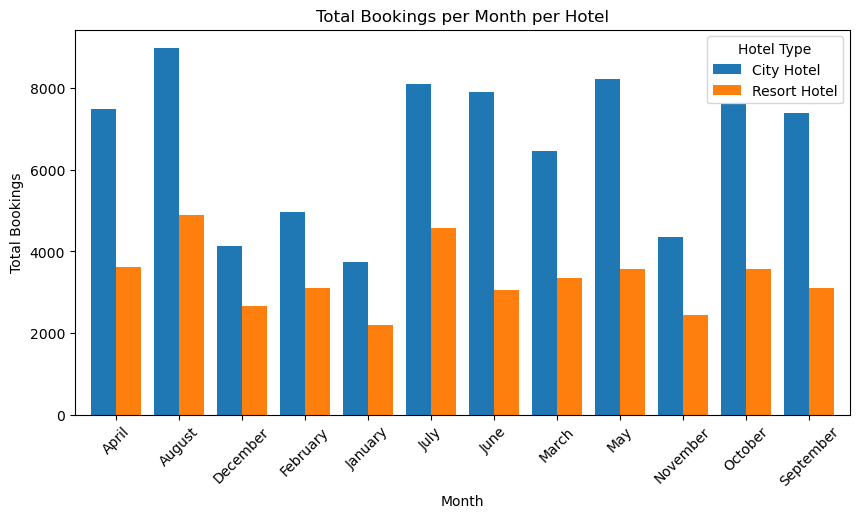

In [91]:
df_pivot.plot(kind="bar",figsize=(10,5),width=0.8)
plt.xlabel("Month")
plt.ylabel("Total Bookings")
plt.title("Total Bookings per Month per Hotel")
plt.legend(title="Hotel Type")
plt.xticks(rotation=45)
plt.show()

# Joins And Multi-Table Queries

#### Hotel-Specific Cancellation Rate

In [92]:
query12="""
select hotel,count(*) as total_cancellations
    from hotel 
        where is_canceled=1
            group by hotel;
"""

In [93]:
df12=pd.read_sql(query12,engine)

In [94]:
df12.head()

,hotel,total_cancellations
0,City Hotel,33102
1,Resort Hotel,11122


#### Countries With High Cancellation Rates

In [95]:
query13="""
select country,
sum(case when is_canceled=1 then 1 else 0 end) as total_cancellations,
round((100.0*(sum(case when is_canceled=1 then 1 else 0 end))/nullif(count(*),0)),2) as cancellation_rate
    from hotel 
        group by country 
            order by total_cancellations desc 
                limit 10;
"""

In [96]:
df13=pd.read_sql(query13,engine)

In [97]:
df13.head(10)

,country,total_cancellations,cancellation_rate
0,PRT,27519,56.64
1,GBR,2453,20.22
2,ESP,2177,25.41
3,FRA,1934,18.57
4,ITA,1333,35.40
5,DEU,1218,16.71
6,IRL,832,24.65
7,BRA,830,37.32
8,USA,501,23.89
9,BEL,474,20.24


# Model Building

In [98]:
print(df.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0          0               2015               July   
1  Resort Hotel            0         78               2015           November   
2  Resort Hotel            0         15               2015           November   
3  Resort Hotel            0         78               2015           November   
4  Resort Hotel            0         78               2015           November   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        47                         21   
2                        47                         21   
3                        47                         21   
4                        47                         21   

   stays_in_weekend_nights  stays_in_week_night    adults  ...  deposit_type  \
0                 -0.92889            -0.786207  0.247897  ...    No Deposit   
1   

* hotel-->"Resort Hotel", "City Hotel"
* meal-- "FB", "BB", "SC", "HB"
* country-->177
* market_segment-->8
* distribution_channel-->5
* reserved_room_type-->10
* assigned_room_type-->12
* deposit_type-->3
* customer_type-->4

In [99]:
del df['arrival_date_week_number']

In [100]:
del df['arrival_date_day_of_month']

In [101]:
del df['lead_time']

In [102]:
del df['reservation_status_date']

In [103]:
month_transform = {'January': 1,'February': 2,'March': 3,'April': 4,'May': 5, 
                 'June': 6,'July': 7,'August': 8,'September': 9, 
                 'October': 10,'November': 11,'December': 12}
df['arrival_date_month'] = df['arrival_date_month'].map(month_transform)

In [104]:
top_countries = df['country'].value_counts().index[:5] 
df['country'] = df['country'].apply(lambda x: x if x in top_countries else 'Other')
df = pd.get_dummies(df, columns=['country'], drop_first=True)

In [105]:
reservation_status_transform = {'Canceled': 0,'No-Show': 1,'Check-Out': 2}
df['reservation_status'] = df['reservation_status'].map(reservation_status_transform)

In [106]:
lead_time_transform = {'Short': 0,'Medium': 1,'Large': 2}
df['lead_time_category'] = df['lead_time_category'].map(lead_time_transform)

In [107]:
categorical_col = ['hotel','meal','market_segment','distribution_channel', 
                    'reserved_room_type','assigned_room_type', 
                    'deposit_type','customer_type']
df = pd.get_dummies(df,columns=categorical_col, drop_first=True).astype(int)

In [108]:
df.head()

,is_canceled,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_night,adults,children,babies,is_repeated_guest,previous_cancellations,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,2015,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,2015,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,2015,11,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,2015,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,2015,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [109]:
df.corr()

,is_canceled,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_night,adults,children,babies,is_repeated_guest,previous_cancellations,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
is_canceled,1.000000,0.016660,0.011022,0.003602,0.019504,0.051890,0.004813,-0.032408,-0.084793,0.101947,...,-0.002869,-0.040784,-0.032813,0.003773,0.013071,0.481457,-0.011312,-0.038698,0.133084,-0.124135
arrival_date_year,0.016660,1.000000,-0.527739,0.014086,0.010490,0.018192,0.054461,-0.013179,0.010341,-0.111645,...,0.001466,0.000252,0.008906,-0.004731,0.004867,-0.065963,-0.000760,-0.010982,0.227954,-0.163588
arrival_date_month,0.011022,-0.527739,1.000000,0.011433,0.005364,0.025209,0.005406,0.010126,-0.030729,0.035116,...,0.008294,-0.005540,0.004145,0.000419,0.003614,0.008746,-0.020504,0.011810,-0.079522,0.041564
stays_in_weekend_nights,0.003602,0.014086,0.011433,1.000000,0.673615,0.051166,0.039030,0.015904,-0.062748,-0.010957,...,0.007826,0.010422,0.018064,-0.001593,-0.001720,-0.095191,-0.004770,-0.007237,0.008714,-0.058077
stays_in_week_night,0.019504,0.010490,0.005364,0.673615,1.000000,0.039497,0.027792,0.014188,-0.066330,-0.006697,...,0.008080,-0.014216,0.006330,-0.000516,-0.010192,-0.061907,-0.003301,-0.010166,-0.016678,-0.042444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
deposit_type_Non Refund,0.481457,-0.065963,0.008746,-0.095191,-0.061907,-0.022469,-0.096266,-0.030345,-0.058423,0.133857,...,-0.028233,-0.020138,-0.018056,-0.001080,-0.003740,1.000000,-0.013752,-0.025999,0.115867,-0.121451
deposit_type_Refundable,-0.011312,-0.000760,-0.020504,-0.004770,-0.003301,0.002898,-0.006735,-0.002998,-0.001514,-0.003507,...,-0.002855,-0.002036,-0.001784,-0.000107,-0.000370,-0.013752,1.000000,0.023679,-0.053428,0.054654
customer_type_Group,-0.038698,-0.010982,0.011810,-0.007237,-0.010166,0.088509,-0.006508,0.000509,0.097977,-0.004003,...,-0.003829,0.007120,0.004131,-0.000202,0.011349,-0.025999,0.023679,1.000000,-0.120893,-0.035977
customer_type_Transient,0.133084,0.227954,-0.079522,0.008714,-0.016678,0.067532,0.095580,0.021502,0.023487,-0.022997,...,0.031826,-0.007899,0.003843,0.001668,0.003848,0.115867,-0.053428,-0.120893,1.000000,-0.895595


In [110]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [111]:
pd.set_option('display.width', 1000)  
pd.set_option('display.float_format', '{:.4f}'.format)  

In [112]:
df.corr()

,is_canceled,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_night,adults,children,babies,is_repeated_guest,previous_cancellations,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
is_canceled,1.0000,0.0167,0.0110,0.0036,0.0195,0.0519,0.0048,-0.0324,-0.0848,0.1019,...,-0.0029,-0.0408,-0.0328,0.0038,0.0131,0.4815,-0.0113,-0.0387,0.1331,-0.1241
arrival_date_year,0.0167,1.0000,-0.5277,0.0141,0.0105,0.0182,0.0545,-0.0132,0.0103,-0.1116,...,0.0015,0.0003,0.0089,-0.0047,0.0049,-0.0660,-0.0008,-0.0110,0.2280,-0.1636
arrival_date_month,0.0110,-0.5277,1.0000,0.0114,0.0054,0.0252,0.0054,0.0101,-0.0307,0.0351,...,0.0083,-0.0055,0.0041,0.0004,0.0036,0.0087,-0.0205,0.0118,-0.0795,0.0416
stays_in_weekend_nights,0.0036,0.0141,0.0114,1.0000,0.6736,0.0512,0.0390,0.0159,-0.0627,-0.0110,...,0.0078,0.0104,0.0181,-0.0016,-0.0017,-0.0952,-0.0048,-0.0072,0.0087,-0.0581
stays_in_week_night,0.0195,0.0105,0.0054,0.6736,1.0000,0.0395,0.0278,0.0142,-0.0663,-0.0067,...,0.0081,-0.0142,0.0063,-0.0005,-0.0102,-0.0619,-0.0033,-0.0102,-0.0167,-0.0424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
deposit_type_Non Refund,0.4815,-0.0660,0.0087,-0.0952,-0.0619,-0.0225,-0.0963,-0.0303,-0.0584,0.1339,...,-0.0282,-0.0201,-0.0181,-0.0011,-0.0037,1.0000,-0.0138,-0.0260,0.1159,-0.1215
deposit_type_Refundable,-0.0113,-0.0008,-0.0205,-0.0048,-0.0033,0.0029,-0.0067,-0.0030,-0.0015,-0.0035,...,-0.0029,-0.0020,-0.0018,-0.0001,-0.0004,-0.0138,1.0000,0.0237,-0.0534,0.0547
customer_type_Group,-0.0387,-0.0110,0.0118,-0.0072,-0.0102,0.0885,-0.0065,0.0005,0.0980,-0.0040,...,-0.0038,0.0071,0.0041,-0.0002,0.0113,-0.0260,0.0237,1.0000,-0.1209,-0.0360
customer_type_Transient,0.1331,0.2280,-0.0795,0.0087,-0.0167,0.0675,0.0956,0.0215,0.0235,-0.0230,...,0.0318,-0.0079,0.0038,0.0017,0.0038,0.1159,-0.0534,-0.1209,1.0000,-0.8956


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 62 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   is_canceled                     119390 non-null  int32
 1   arrival_date_year               119390 non-null  int32
 2   arrival_date_month              119390 non-null  int32
 3   stays_in_weekend_nights         119390 non-null  int32
 4   stays_in_week_night             119390 non-null  int32
 5   adults                          119390 non-null  int32
 6   children                        119390 non-null  int32
 7   babies                          119390 non-null  int32
 8   is_repeated_guest               119390 non-null  int32
 9   previous_cancellations          119390 non-null  int32
 10  previous_bookings_not_canceled  119390 non-null  int32
 11  booking_changes                 119390 non-null  int32
 12  agent                           119390 non-n

In [114]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Increase display width
pd.set_option('display.float_format', '{:.4f}'.format)  # Format floats for better readability


In [115]:
df.corr()

,is_canceled,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_night,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,lead_time_category,country_ESP,country_FRA,country_GBR,country_Other,country_PRT,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
is_canceled,1.0000,0.0167,0.0110,0.0036,0.0195,0.0519,0.0048,-0.0324,-0.0848,0.1019,-0.0472,-0.1285,-0.0778,0.0489,0.0492,-0.1939,-0.1171,-0.9946,0.2845,-0.0670,-0.1183,-0.1171,-0.1201,0.3361,-0.1365,0.0388,-0.0198,0.0013,-0.0393,-0.0817,-0.1544,0.2219,-0.0285,-0.0062,-0.1516,-0.0149,0.1761,-0.0083,-0.0073,-0.0477,-0.0386,-0.0218,-0.0017,0.0055,-0.0005,0.0131,-0.0376,-0.0539,-0.1280,-0.0648,-0.0460,-0.0199,-0.0029,-0.0408,-0.0328,0.0038,0.0131,0.4815,-0.0113,-0.0387,0.1331,-0.1241
arrival_date_year,0.0167,1.0000,-0.5277,0.0141,0.0105,0.0182,0.0545,-0.0132,0.0103,-0.1116,0.0264,0.0295,0.0589,-0.0527,0.2076,-0.0132,0.0604,-0.0172,0.0665,-0.0303,0.0387,0.0758,0.1204,-0.1916,-0.0353,-0.0580,-0.0580,0.1287,-0.0101,-0.0252,0.0132,-0.1065,-0.1238,0.1812,-0.0006,0.0167,0.0169,-0.0267,0.0218,0.0774,0.0377,0.0209,0.0225,0.0062,-0.0116,0.0049,-0.0486,0.0054,0.0267,0.0166,0.0068,0.0145,0.0015,0.0003,0.0089,-0.0047,0.0049,-0.0660,-0.0008,-0.0110,0.2280,-0.1636
arrival_date_month,0.0110,-0.5277,1.0000,0.0114,0.0054,0.0252,0.0054,0.0101,-0.0307,0.0351,-0.0179,0.0044,-0.0276,0.0208,0.0839,-0.0001,0.0331,-0.0138,0.0878,0.0252,-0.0037,-0.0107,-0.0252,0.0232,-0.0018,0.0218,0.0399,-0.0383,0.0076,-0.0195,-0.0173,0.0026,0.0678,-0.0385,-0.0173,-0.0043,0.0110,0.0061,0.0064,-0.0099,-0.0083,0.0025,-0.0020,0.0052,0.0018,0.0036,0.0132,0.0064,-0.0140,-0.0056,0.0021,0.0012,0.0083,-0.0055,0.0041,0.0004,0.0036,0.0087,-0.0205,0.0118,-0.0795,0.0416
stays_in_weekend_nights,0.0036,0.0141,0.0114,1.0000,0.6736,0.0512,0.0390,0.0159,-0.0627,-0.0110,-0.0304,0.0738,0.1404,-0.0416,0.0277,-0.0174,0.0404,-0.0013,0.1505,-0.0368,-0.0048,0.1385,0.0571,-0.1157,0.1947,0.0067,0.1099,-0.0419,-0.0344,-0.0784,-0.0136,-0.0637,0.0809,0.0274,-0.0233,-0.0130,0.0656,0.0005,0.0274,0.0884,0.0964,0.0184,0.0345,0.0111,-0.0039,-0.0017,-0.0173,0.0187,0.0451,0.0770,0.0080,0.0257,0.0078,0.0104,0.0181,-0.0016,-0.0017,-0.0952,-0.0048,-0.0072,0.0087,-0.0581
stays_in_week_night,0.0195,0.0105,0.0054,0.6736,1.0000,0.0395,0.0278,0.0142,-0.0663,-0.0067,-0.0222,0.0892,0.1697,-0.0151,0.0242,-0.0166,0.0304,-0.0178,0.1779,-0.0354,-0.0146,0.1348,0.0287,-0.0795,0.2262,0.0191,0.1269,-0.0580,-0.0279,-0.0503,-0.0105,-0.0396,0.0854,-0.0082,-0.0096,-0.0147,0.0401,-0.0083,0.0293,0.0854,0.1046,0.0124,0.0316,0.0118,-0.0013,-0.0102,-0.0220,0.0263,0.0439,0.0873,0.0071,0.0263,0.0081,-0.0142,0.0063,-0.0005,-0.0102,-0.0619,-0.0033,-0.0102,-0.0167,-0.0424
adults,0.0519,0.0182,0.0252,0.0512,0.0395,1.0000,0.0109,0.0141,-0.1185,-0.0039,-0.0744,-0.0423,-0.0194,-0.0048,0.1899,0.0119,0.0579,-0.0551,0.1237,0.0307,0.0374,0.0263,0.0361,-0.0902,0.0177,0.0116,0.0413,-0.0065,-0.0422,-0.1821,0.0147,-0.0363,-0.0237,0.1235,-0.0010,-0.0420,0.1119,-0.0627,0.0230,0.1390,0.0404,0.0291,0.0422,0.0858,0.0046,-0.0389,-0.0525,0.0248,0.0904,0.0324,0.0257,0.0386

In [116]:
corr_matrix = df.corr()

In [117]:
target_var = "is_canceled"

In [118]:
target_corr = corr_matrix[target_var]

In [119]:
selected_features = target_corr[abs(target_corr) >= 0.1].index

In [120]:
df=df[selected_features]

In [121]:
df.corr()

,is_canceled,previous_cancellations,booking_changes,required_car_parking_spaces,total_of_special_requests,reservation_status,lead_time_category,country_FRA,country_GBR,country_Other,country_PRT,hotel_Resort Hotel,market_segment_Direct,market_segment_Groups,distribution_channel_Direct,distribution_channel_TA/TO,assigned_room_type_D,deposit_type_Non Refund,customer_type_Transient,customer_type_Transient-Party
is_canceled,1.0000,0.1019,-0.1285,-0.1939,-0.1171,-0.9946,0.2845,-0.1183,-0.1171,-0.1201,0.3361,-0.1365,-0.1544,0.2219,-0.1516,0.1761,-0.1280,0.4815,0.1331,-0.1241
previous_cancellations,0.1019,1.0000,-0.0226,-0.0172,-0.0169,-0.1037,0.0542,-0.0273,-0.0286,-0.0372,0.0913,0.0161,-0.0260,0.0922,-0.0248,-0.0097,-0.0408,0.1339,-0.0230,0.0135
booking_changes,-0.1285,-0.0226,1.0000,0.0592,0.0492,0.1297,0.0153,-0.0020,0.0289,0.0437,-0.0599,0.0666,0.0828,-0.0049,0.0913,-0.1054,0.0078,-0.1065,-0.0799,0.0956
required_car_parking_spaces,-0.1939,-0.0172,0.0592,1.0000,0.0495,0.1929,-0.1287,-0.0090,-0.0217,-0.0181,0.0041,0.2172,0.1472,-0.0870,0.1384,-0.1422,0.0283,-0.0942,0.0650,-0.0602
total_of_special_requests,-0.1171,-0.0169,0.0492,0.0495,1.0000,0.1176,-0.0111,0.0242,0.0242,0.0606,-0.0986,0.0254,0.0232,-0.1396,0.0162,0.0223,0.0567,-0.1222,0.0771,-0.0967
reservation_status,-0.9946,-0.1037,0.1297,0.1929,0.1176,1.0000,-0.2910,0.1170,0.1157,0.1211,-0.3341,0.1356,0.1581,-0.2267,0.1550,-0.1799,0.1292,-0.4885,-0.1332,0.1244
lead_time_category,0.2845,0.0542,0.0153,-0.1287,-0.0111,-0.2910,1.0000,-0.0230,0.0851,-0.0113,-0.0038,-0.0735,-0.1967,0.2420,-0.1818,0.2716,-0.0831,0.2792,-0.1287,0.1268
country_FRA,-0.1183,-0.0273,-0.0020,-0.0090,0.0242,0.1170,-0.0230,1.0000,-0.1040,-0.1887,-0.2561,-0.1184,-0.0081,-0.0896,-0.0234,0.0482,0.0599,-0.1143,0.0319,-0.0223
country_GBR,-0.1171,-0.0286,0.0289,-0.0217,0.0242,0.1157,0.0851,-0.1040,1.0000,-0.2052,-0.2786,0.1611,-0.0363,-0.0374,-0.0178,0.0203,0.0489,-0.1138,-0.0370,-0.0271
country_Other,-0.1201,-0.0372,0.0437,-0.0181,0.0606,0.1211,-0.0113,-0.1887,-0.2052,1.0000,-0.5056,-0.0809,-0.0013,-0.1637,-0.0252,0.0577,0.0507,-0.2227,0.0714,-0.0505


In [122]:
del df['distribution_channel_Direct']

In [123]:
del df['customer_type_Transient-Party']

In [124]:
del df['reservation_status']

del df['market_segment_Direct']

In [125]:
df.corr()

,is_canceled,previous_cancellations,booking_changes,required_car_parking_spaces,total_of_special_requests,lead_time_category,country_FRA,country_GBR,country_Other,country_PRT,hotel_Resort Hotel,market_segment_Direct,market_segment_Groups,distribution_channel_TA/TO,assigned_room_type_D,deposit_type_Non Refund,customer_type_Transient
is_canceled,1.0000,0.1019,-0.1285,-0.1939,-0.1171,0.2845,-0.1183,-0.1171,-0.1201,0.3361,-0.1365,-0.1544,0.2219,0.1761,-0.1280,0.4815,0.1331
previous_cancellations,0.1019,1.0000,-0.0226,-0.0172,-0.0169,0.0542,-0.0273,-0.0286,-0.0372,0.0913,0.0161,-0.0260,0.0922,-0.0097,-0.0408,0.1339,-0.0230
booking_changes,-0.1285,-0.0226,1.0000,0.0592,0.0492,0.0153,-0.0020,0.0289,0.0437,-0.0599,0.0666,0.0828,-0.0049,-0.1054,0.0078,-0.1065,-0.0799
required_car_parking_spaces,-0.1939,-0.0172,0.0592,1.0000,0.0495,-0.1287,-0.0090,-0.0217,-0.0181,0.0041,0.2172,0.1472,-0.0870,-0.1422,0.0283,-0.0942,0.0650
total_of_special_requests,-0.1171,-0.0169,0.0492,0.0495,1.0000,-0.0111,0.0242,0.0242,0.0606,-0.0986,0.0254,0.0232,-0.1396,0.0223,0.0567,-0.1222,0.0771
lead_time_category,0.2845,0.0542,0.0153,-0.1287,-0.0111,1.0000,-0.0230,0.0851,-0.0113,-0.0038,-0.0735,-0.1967,0.2420,0.2716,-0.0831,0.2792,-0.1287
country_FRA,-0.1183,-0.0273,-0.0020,-0.0090,0.0242,-0.0230,1.0000,-0.1040,-0.1887,-0.2561,-0.1184,-0.0081,-0.0896,0.0482,0.0599,-0.1143,0.0319
country_GBR,-0.1171,-0.0286,0.0289,-0.0217,0.0242,0.0851,-0.1040,1.0000,-0.2052,-0.2786,0.1611,-0.0363,-0.0374,0.0203,0.0489,-0.1138,-0.0370
country_Other,-0.1201,-0.0372,0.0437,-0.0181,0.0606,-0.0113,-0.1887,-0.2052,1.0000,-0.5056,-0.0809,-0.0013,-0.1637,0.0577,0.0507,-0.2227,0.0714
country_PRT,0.3361,0.0913,-0.0599,0.0041,-0.0986,-0.0038,-0.2561,-0.2786,-0.5056,1.0000,0.0479,0.0399,0.2672,-0.1352,-0.1228,0.4289,-0.0528


In [126]:
df.head()

,is_canceled,previous_cancellations,booking_changes,required_car_parking_spaces,total_of_special_requests,lead_time_category,country_FRA,country_GBR,country_Other,country_PRT,hotel_Resort Hotel,market_segment_Direct,market_segment_Groups,distribution_channel_TA/TO,assigned_room_type_D,deposit_type_Non Refund,customer_type_Transient
0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0


#### Test-Train split

In [127]:
x=df.drop('is_canceled',axis=1)

In [128]:
y=df['is_canceled']

In [129]:
x.head()

,previous_cancellations,booking_changes,required_car_parking_spaces,total_of_special_requests,lead_time_category,country_FRA,country_GBR,country_Other,country_PRT,hotel_Resort Hotel,market_segment_Direct,market_segment_Groups,distribution_channel_TA/TO,assigned_room_type_D,deposit_type_Non Refund,customer_type_Transient
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0


In [130]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: int32

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [133]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(95512, 16) (23878, 16) (95512,) (23878,)


##### LOGISTIC REGRESSION

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
clf_lr=LogisticRegression()
clf_lr.fit(x_train,y_train)

LogisticRegression()

In [136]:
y_train_pred1=clf_lr.predict(x_train)
y_test_pred1=clf_lr.predict(x_test)

In [137]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [138]:
confusion_matrix(y_train,y_train_pred1)

array([[55563,  4572],
       [16617, 18760]], dtype=int64)

In [139]:
confusion_matrix(y_test,y_test_pred1)

array([[13890,  1141],
       [ 4225,  4622]], dtype=int64)

In [140]:
accuracy_score(y_train,y_train_pred1)

0.7781535304464361

In [141]:
accuracy_score(y_test,y_test_pred1)

0.77527431108133

In [142]:
accuracy_lr = accuracy_score(y_test,clf_lr.predict(x_test))
precision_lr = precision_score(y_test,clf_lr.predict(x_test))
recall_lr = recall_score(y_test,clf_lr.predict(x_test))
f1_lr = f1_score(y_test,clf_lr.predict(x_test))
auc_roc_lr = roc_auc_score(y_test,clf_lr.predict(x_test))

In [143]:
print(f"Accuracy_lr: {accuracy_lr}")
print(f"Precision_lr: {precision_lr}")
print(f"Recall_lr: {recall_lr}")
print(f"F1-Score_lr: {f1_lr}")
print(f"AUC-ROC_lr: {auc_roc_lr}")

Accuracy_lr: 0.77527431108133
Precision_lr: 0.8020128405344439
Recall_lr: 0.5224369842884594
F1-Score_lr: 0.6327173169062286
AUC-ROC_lr: 0.7232635989235525


##### DECISION TREE

In [144]:
from sklearn import tree
clftree=tree.DecisionTreeClassifier(max_depth=3)

In [145]:
clftree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [146]:
y_train_pred2=clftree.predict(x_train)
y_test_pred2=clftree.predict(x_test)

In [147]:
confusion_matrix(y_train,y_train_pred2)

array([[60034,   101],
       [22120, 13257]], dtype=int64)

In [148]:
confusion_matrix(y_test,y_test_pred2)

array([[15017,    14],
       [ 5627,  3220]], dtype=int64)

In [149]:
accuracy_score(y_train,y_train_pred2)

0.7673486054108384

In [150]:
accuracy_score(y_test,y_test_pred2)

0.7637574336209063

In [151]:
accuracy_clftree = accuracy_score(y_test,clftree.predict(x_test))
precision_clftree = precision_score(y_test,clftree.predict(x_test))
recall_clftree = recall_score(y_test,clftree.predict(x_test))
f1_clftree = f1_score(y_test,clftree.predict(x_test))
auc_roc_clftree = roc_auc_score(y_test,clftree.predict(x_test))

In [152]:
print(f"Accuracy_cvgbc: {accuracy_clftree}")
print(f"Precision_cvgbc: {precision_clftree}")
print(f"Recall_cvgbc: {recall_clftree}")
print(f"F1-Score_cvgbc: {f1_clftree}")
print(f"AUC-ROC_cvgbc: {auc_roc_clftree}")

Accuracy_cvgbc: 0.7637574336209063
Precision_cvgbc: 0.9956709956709957
Recall_cvgbc: 0.3639651859387363
F1-Score_cvgbc: 0.5330684545981293
AUC-ROC_cvgbc: 0.6815168887580715


##### DECISION TREE USING GRID SEARCH CV

In [153]:
from sklearn.model_selection import GridSearchCV

In [154]:
clftree_gs = tree.DecisionTreeClassifier(random_state=42)

In [155]:
params_grid = {
    'max_depth': [3, 5, 7],    
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 3, 5] 
}

In [156]:
grid_search = GridSearchCV(clftree_gs, params_grid, cv=3, scoring='accuracy', n_jobs=-1)

In [157]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [158]:
grid_search.best_params_

{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [159]:
clftree_cv=grid_search.best_estimator_

In [160]:
confusion_matrix(y_train,clftree_cv.predict(x_train))

array([[55830,  4305],
       [15984, 19393]], dtype=int64)

In [161]:
confusion_matrix(y_test,clftree_cv.predict(x_test))

array([[13994,  1037],
       [ 4102,  4745]], dtype=int64)

In [162]:
accuracy_score(y_train,clftree_cv.predict(x_train))

0.7875764301867828

In [163]:
accuracy_score(y_test,clftree_cv.predict(x_test))

0.78478096993048

In [164]:
accuracy_cvclftree = accuracy_score(y_test,clftree_cv.predict(x_test))
precision_cvclftree = precision_score(y_test,clftree_cv.predict(x_test))
recall_cvclftree = recall_score(y_test,clftree_cv.predict(x_test))
f1_cvclftree = f1_score(y_test,clftree_cv.predict(x_test))
auc_roc_cvclftree = roc_auc_score(y_test,clftree_cv.predict(x_test))

In [165]:
print(f"Accuracy_cvgbc: {accuracy_cvclftree}")
print(f"Precision_cvgbc: {precision_cvclftree}")
print(f"Recall_cvgbc: {recall_cvclftree}")
print(f"F1-Score_cvgbc: {f1_cvclftree}")
print(f"AUC-ROC_cvgbc: {auc_roc_cvclftree}")

Accuracy_cvgbc: 0.78478096993048
Precision_cvgbc: 0.8206502940159115
Recall_cvgbc: 0.5363400022606534
F1-Score_cvgbc: 0.6487114635313419
AUC-ROC_cvgbc: 0.7336746249078532


##### RANDOM FOREST

In [166]:
from sklearn.ensemble import RandomForestClassifier

In [167]:
rf_clf=RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=42)

In [168]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [169]:
confusion_matrix(y_train,rf_clf.predict(x_train))

array([[55124,  5011],
       [13681, 21696]], dtype=int64)

In [170]:
confusion_matrix(y_test,rf_clf.predict(x_test))

array([[13710,  1321],
       [ 3593,  5254]], dtype=int64)

In [171]:
accuracy_score(y_train,rf_clf.predict(x_train))

0.8042968422815981

In [172]:
accuracy_score(y_test,rf_clf.predict(x_test))

0.7942038696708267

In [173]:
accuracy_rf = accuracy_score(y_test,rf_clf.predict(x_test))
precision_rf = precision_score(y_test,rf_clf.predict(x_test))
recall_rf = recall_score(y_test,rf_clf.predict(x_test))
f1_rf = f1_score(y_test,rf_clf.predict(x_test))
auc_roc_rf = roc_auc_score(y_test,rf_clf.predict(x_test))

In [174]:
print(f"Accuracy_cvgbc: {accuracy_rf}")
print(f"Precision_cvgbc: {precision_rf}")
print(f"Recall_cvgbc: {recall_rf}")
print(f"F1-Score_cvgbc: {f1_rf}")
print(f"AUC-ROC_cvgbc: {auc_roc_rf}")

Accuracy_cvgbc: 0.7942038696708267
Precision_cvgbc: 0.7990874524714829
Recall_cvgbc: 0.5938736294789194
F1-Score_cvgbc: 0.6813642847879653
AUC-ROC_cvgbc: 0.7529942959449684


##### RANDOM FOREST USING GRID SEARCH CV

In [175]:
from sklearn.model_selection import GridSearchCV

In [176]:
rf_clf_gs=RandomForestClassifier(n_estimators=250,random_state=42)

In [177]:
params_grid={"max_features":[4,5,6,7,8,9,10],
            "min_samples_split":[2,3,10]}

In [178]:
grid_search=GridSearchCV(rf_clf_gs,params_grid,n_jobs=-1,scoring='accuracy')

In [179]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [180]:
grid_search.best_params_

{'max_features': 4, 'min_samples_split': 10}

In [181]:
cvrf_clf=grid_search.best_estimator_

In [182]:
confusion_matrix(y_train,cvrf_clf.predict(x_train))

array([[55175,  4960],
       [13812, 21565]], dtype=int64)

In [183]:
confusion_matrix(y_test,cvrf_clf.predict(x_test))

array([[13741,  1290],
       [ 3614,  5233]], dtype=int64)

In [184]:
accuracy_score(y_train,cvrf_clf.predict(x_train))

0.8034592511935673

In [185]:
accuracy_score(y_test,cvrf_clf.predict(x_test))

0.7946226652148421

In [186]:
accuracy_cvrf = accuracy_score(y_test,cvrf_clf.predict(x_test))
precision_cvrf = precision_score(y_test,cvrf_clf.predict(x_test))
recall_cvrf = recall_score(y_test,cvrf_clf.predict(x_test))
f1_cvrf = f1_score(y_test,cvrf_clf.predict(x_test))
auc_roc_cvrf = roc_auc_score(y_test,cvrf_clf.predict(x_test))

In [187]:
print(f"Accuracy_cvgbc: {accuracy_cvrf}")
print(f"Precision_cvgbc: {precision_cvrf}")
print(f"Recall_cvgbc: {recall_cvrf}")
print(f"F1-Score_cvgbc: {f1_cvrf}")
print(f"AUC-ROC_cvgbc: {auc_roc_cvrf}")

Accuracy_cvgbc: 0.7946226652148421
Precision_cvgbc: 0.802238233941438
Recall_cvgbc: 0.5914999434836667
F1-Score_cvgbc: 0.6809368900455433
AUC-ROC_cvgbc: 0.7528386551294989


##### GRADIENT BOOSTING

In [188]:
from sklearn.ensemble import GradientBoostingClassifier

In [189]:
gbc_clf=GradientBoostingClassifier()
gbc_clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [190]:
confusion_matrix(y_train,gbc_clf.predict(x_train))

array([[55347,  4788],
       [14740, 20637]], dtype=int64)

In [191]:
confusion_matrix(y_test,gbc_clf.predict(x_test))

array([[13847,  1184],
       [ 3772,  5075]], dtype=int64)

In [192]:
accuracy_score(y_train,gbc_clf.predict(x_train))

0.795544015411676

In [193]:
accuracy_score(y_test,gbc_clf.predict(x_test))

0.7924449283859619

In [194]:
accuracy_gbc = accuracy_score(y_test,gbc_clf.predict(x_test))
precision_gbc = precision_score(y_test,gbc_clf.predict(x_test))
recall_gbc = recall_score(y_test,gbc_clf.predict(x_test))
f1_gbc = f1_score(y_test,gbc_clf.predict(x_test))
auc_roc_gbc = roc_auc_score(y_test,gbc_clf.predict(x_test))

In [195]:
print(f"Accuracy_gbc: {accuracy_gbc}")
print(f"Precision_gbc: {precision_gbc}")
print(f"Recall_gbc: {recall_gbc}")
print(f"F1-Score_gbc: {f1_gbc}")
print(f"AUC-ROC_gbc: {auc_roc_gbc}")

Accuracy_gbc: 0.7924449283859619
Precision_gbc: 0.8108324013420675
Recall_gbc: 0.5736407821860517
F1-Score_gbc: 0.6719184430027804
AUC-ROC_gbc: 0.7474351206519374


##### GRADIENT BOOSTING USING GRID SEARCH CV

In [196]:
gbc_clf_gs = GradientBoostingClassifier(max_depth=3)

In [197]:
params_grid = {
    'n_estimators': [100, 150],       
    'learning_rate': [0.05, 0.1],                   
    'subsample': [0.8, 1.0],         
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}

In [198]:
grid_search = GridSearchCV(gbc_clf_gs,params_grid,n_jobs=-1,scoring='accuracy',cv=5)

In [199]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 150], 'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [200]:
grid_search.best_params_

{'learning_rate': 0.1,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 150,
 'subsample': 0.8}

In [201]:
cvgbc_clf=grid_search.best_estimator_

In [202]:
confusion_matrix(y_train,cvgbc_clf.predict(x_train))

array([[55242,  4893],
       [14549, 20828]], dtype=int64)

In [203]:
confusion_matrix(y_test,cvgbc_clf.predict(x_test))

array([[13823,  1208],
       [ 3733,  5114]], dtype=int64)

In [204]:
accuracy_score(y_train,cvgbc_clf.predict(x_train))

0.7964444258313091

In [205]:
accuracy_score(y_test,cvgbc_clf.predict(x_test))

0.7930731217019851

In [206]:
accuracy_cvgbc = accuracy_score(y_test,cvgbc_clf.predict(x_test))
precision_cvgbc = precision_score(y_test,cvgbc_clf.predict(x_test))
recall_cvgbc = recall_score(y_test,cvgbc_clf.predict(x_test))
f1_cvgbc = f1_score(y_test,cvgbc_clf.predict(x_test))
auc_roc_cvgbc = roc_auc_score(y_test,cvgbc_clf.predict(x_test))

In [207]:
print(f"Accuracy_cvgbc: {accuracy_cvgbc}")
print(f"Precision_cvgbc: {precision_cvgbc}")
print(f"Recall_cvgbc: {recall_cvgbc}")
print(f"F1-Score_cvgbc: {f1_cvgbc}")
print(f"AUC-ROC_cvgbc: {auc_roc_cvgbc}")

Accuracy_cvgbc: 0.7930731217019851
Precision_cvgbc: 0.8089212274596647
Recall_cvgbc: 0.5780490561772352
F1-Score_cvgbc: 0.6742698925440043
AUC-ROC_cvgbc: 0.7488409075710207


# MODEL TESTING

#### PERFORMANCE EVALUATION

In [208]:
test_results = {
    "Logistic Regression": [0.7761, 0.8050, 0.5253, 0.6357, 0.7250],  
    "Decision Tree (Base)": [0.7637, 0.9948, 0.3666, 0.5358, 0.6827],
    "Decision Tree (Grid Search)": [0.7831, 0.8159, 0.5381, 0.6485, 0.7331],
    "Random Forest (Base)": [0.7945, 0.8037, 0.5921, 0.6818, 0.7532],
    "Random Forest (Grid Search)": [0.7950, 0.8069, 0.5901, 0.6817, 0.7533],
    "Gradient Boosting (Base)": [0.7924, 0.8101, 0.5773, 0.6742, 0.7486],
    "Gradient Boosting (Grid Search)": [0.7929, 0.8102, 0.5788, 0.6752, 0.7492]
}

In [209]:
df_test_results = pd.DataFrame(test_results, 
                               index=["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC"]).T

In [210]:
df_test_results.sort_values(by="Accuracy", ascending=False, inplace=True)

In [211]:
print(df_test_results)

                                 Accuracy  Precision  Recall  F1-Score  AUC-ROC
Random Forest (Grid Search)        0.7950     0.8069  0.5901    0.6817   0.7533
Random Forest (Base)               0.7945     0.8037  0.5921    0.6818   0.7532
Gradient Boosting (Grid Search)    0.7929     0.8102  0.5788    0.6752   0.7492
Gradient Boosting (Base)           0.7924     0.8101  0.5773    0.6742   0.7486
Decision Tree (Grid Search)        0.7831     0.8159  0.5381    0.6485   0.7331
Logistic Regression                0.7761     0.8050  0.5253    0.6357   0.7250
Decision Tree (Base)               0.7637     0.9948  0.3666    0.5358   0.6827


* AFTER RUNNING ALL THE MODELS IT'S BEEN FOUND THAT RANDOM FOREST(GRID SEARCH CV) IS THE BEST MODEL WITH TEST ACCURACY OF 0.7950 AND TRAIN ACCURACY OF 0.8030.
* AND OTHER NOTABLE SCORES ARE
Random Forest (Grid Search)
Precision-->0.8069,  Recall-->0.5901,    F1-Score-->0.6817,   AUC-ROC-->0.7533

#### CROSS-VALIDATION TECHNIQUE(Stratified K-Fold VALIDATION)

In [212]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer

In [213]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [214]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

In [215]:
models = {
    "Logistic Regression": clf_lr,  
    "Decision Tree (Base)": clftree,
    "Decision Tree (Grid Search)": clftree_cv,  
    "Random Forest (Base)": rf_clf,
    "Random Forest (Grid Search)": cvrf_clf,
    "Gradient Boosting (Base)": gbc_clf,
    "Gradient Boosting (Grid Search)": cvgbc_clf
}

In [216]:
cv_results = {}

In [217]:
for name, model in models.items():
    scores = cross_validate(model, x_train, y_train, cv=skf, scoring=scoring, n_jobs=-1)
    
    cv_results[name] = {
        "Accuracy": scores['test_accuracy'].mean(),
        "Precision": scores['test_precision'].mean(),
        "Recall": scores['test_recall'].mean(),
        "F1-Score": scores['test_f1'].mean(),
        "AUC-ROC": scores['test_roc_auc'].mean()
    }

In [218]:
df_cv_results = pd.DataFrame(cv_results).T

In [219]:
df_cv_results.sort_values(by="Accuracy", ascending=False, inplace=True)

In [220]:
print(df_cv_results)

                                 Accuracy  Precision  Recall  F1-Score  AUC-ROC
Random Forest (Grid Search)        0.7993     0.8033  0.6067    0.6913   0.7596
Random Forest (Base)               0.7981     0.7992  0.6077    0.6904   0.7589
Gradient Boosting (Grid Search)    0.7955     0.8060  0.5902    0.6814   0.7533
Gradient Boosting (Base)           0.7945     0.8110  0.5807    0.6767   0.7505
Decision Tree (Grid Search)        0.7866     0.8363  0.5309    0.6476   0.7340
Logistic Regression                0.7782     0.8041  0.5304    0.6391   0.7272
Decision Tree (Base)               0.7673     0.9924  0.3747    0.5440   0.6865


In [221]:
best_model = cvrf_clf

In [222]:
y_test_pred = best_model.predict(x_test)
y_test_proba = best_model.predict_proba(x_test)[:, 1]

In [223]:
test_results = {
    "Accuracy": accuracy_score(y_test, y_test_pred),
    "Precision": precision_score(y_test, y_test_pred),
    "Recall": recall_score(y_test, y_test_pred),
    "F1-Score": f1_score(y_test, y_test_pred),
    "AUC-ROC": roc_auc_score(y_test, y_test_proba)
}

In [224]:
print(pd.DataFrame(test_results, index=["Test Set Scores"]))

                 Accuracy  Precision  Recall  F1-Score  AUC-ROC
Test Set Scores    0.7946     0.8022  0.5915    0.6809   0.8729


* AFTER CROSS-VALIDATING THE TRAIN DATA USING STRATIFIED K-FOLD TECHNIQUE IT'S BEEN FOUND THAT RANDOM FOREST(GRID SEARCH CV) IS THE BEST MODEL WITH TEST ACCURACY OF 0.0.7946 AND TRAIN ACCURACY OF 0.7987.
* HERE ITS BEEN SEEN THAT THERE IS A INCREASE IN AUC-ROC FROM 0.7533 TO 0.8748 SCORE COMPARE TO PRE-KFOLD WHILE OTHER VALUES REMAINED SAME.
* AFTER CROSS-VALIDATION THE MODEL GETS IMPROVED AS DUE TO LESS OVERFITTING AS TRAIN SCORE GEST SLIGHTLY DECREASED KEEPING THE TEST SCORE STABLE, IMPROVING GENERALIZATION IN THE MODEL